In [438]:
from cpymad.madx import Madx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import glob
import json
import pybt
from pybt.tools.parsers import read_twiss_file
from pybt.myjson.encoder import myJSONDecoder
from os import walk
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [521]:
mypath = "/user/cpsop/EliottFolder/quad-scan-east/bpm_data"

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break

In [522]:
last_folder_created = sorted(dirnames)[-1]
last_folder_created

'bpm_2022-Mar-Thu-9h37m16s'

In [523]:
sorted(dirnames)

['bpm_2022-Mar-Thu-10h59m59s',
 'bpm_2022-Mar-Thu-11h13m55s',
 'bpm_2022-Mar-Thu-13h13m33s',
 'bpm_2022-Mar-Thu-13h16m52s',
 'bpm_2022-Mar-Thu-13h32m54s',
 'bpm_2022-Mar-Thu-13h40m57s',
 'bpm_2022-Mar-Thu-9h22m25s',
 'bpm_2022-Mar-Thu-9h37m16s']

In [564]:
last_folder_created = sorted(dirnames)[4]
last_folder_created

'bpm_2022-Mar-Thu-13h32m54s'

In [565]:
filename = last_folder_created+"/"+last_folder_created
filename

'bpm_2022-Mar-Thu-13h32m54s/bpm_2022-Mar-Thu-13h32m54s'

In [566]:
import json
 
# Opening JSON file
f = open(mypath+"/"+filename+".json")
 
# returns JSON object as
# a dictionary
data = json.load(f)

In [567]:
data[2].keys()

dict_keys(['PE.SMH57/MEAS.PULSE#VALUE', 'PE.SMH57/REF.FUNC.PLAY#value', 'logical.PE.SMH57/I_FUNC_LIST#value', 'logical.PE.SMH57/KL_FUNC_LIST#value', 'PE.SMH61/MEAS.PULSE#VALUE', 'PE.SMH61/REF.FUNC.PLAY#value', 'logical.PE.SMH61/I_FUNC_LIST#value', 'logical.PE.SMH61/KL_FUNC_LIST#value', 'PE.BSW23/REF.TABLE.FUNC#VALUE', 'PE.BSW23/REF.FUNC.PLAY#value', 'PE.BSW23/MEAS.PULSE#VALUE', 'logical.PE.BSW23/I', 'logical.PE.BSW23/K', 'PE.BSW57/REF.TABLE.FUNC#VALUE', 'PE.BSW57/REF.FUNC.PLAY#value', 'PE.BSW57/MEAS.PULSE#VALUE', 'logical.PE.BSW57/I#value', 'logical.PE.BSW57/KL#value', 'PR.QSE/REF.TABLE.FUNC#VALUE', 'PR.QSE/REF.FUNC.PLAY#value', 'PR.QSE/MEAS.PULSE#VALUE', 'PR.XSE/REF.TABLE.FUNC#VALUE', 'PR.XSE/REF.FUNC.PLAY#value', 'PR.XSE/MEAS.PULSE#VALUE', 'PE.KFA71-V/Acquisition', 'PE.KFA71-V/Setting', 'PE2.KFA71-V/Acquisition', 'PE2.KFA71-V/Setting', 'logical.PE.KFA71/I', 'logical.PE.KFA71/K', 'PE.KFA4/BatchAcquisition#kickStrengthAcq', 'PR.DHZ05.OC/MEAS.PULSE#VALUE', 'PR.DHZ05.OC/REF.TABLE.FUNC#VA

In [568]:
data[2]['PE.KFA71-V/Acquisition']

[{'kickStrengthAqn': 0.0},
 {'kickStrengthAqn': 0.0},
 {'kickStrengthAqn': 0.0},
 {'kickStrengthAqn': 0.0},
 {'kickStrengthAqn': 0.0},
 {'kickStrengthAqn': 0.0}]

In [569]:
data[2]['PE.KFA4/BatchAcquisition#kickStrengthAcq']

[59.22331578545815, 0.0, 0.0, 0.0, 0.0, 0.0]

Text(0, 0.5, 'current [A]')

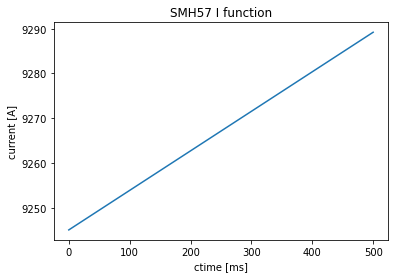

In [570]:
fig, ax = plt.subplots()
x = data[2]['logical.PE.SMH57/I_FUNC_LIST#value'][0][0]["data"][0]
y = data[2]['logical.PE.SMH57/I_FUNC_LIST#value'][0][0]["data"][1]
ax.plot(x,y)
ax.set_title('SMH57 I function')
ax.set_xlabel('ctime [ms]')
ax.set_ylabel('current [A]')

Text(0, 0.5, 'KL')

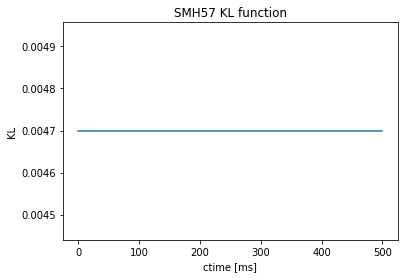

In [571]:
fig, ax = plt.subplots()
x = data[2]['logical.PE.SMH57/KL_FUNC_LIST#value'][0][0]["data"][0]
y = data[2]['logical.PE.SMH57/KL_FUNC_LIST#value'][0][0]["data"][1]
ax.plot(x,y)
ax.set_title('SMH57 KL function')
ax.set_xlabel('ctime [ms]')
ax.set_ylabel('KL')

Text(0, 0.5, 'current [A]')

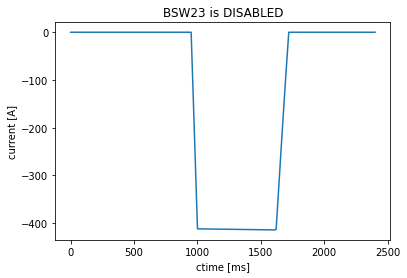

In [572]:
fig, ax = plt.subplots()
x = data[2]['PE.BSW23/REF.TABLE.FUNC#VALUE'][0]["data"][0]
y = data[2]['PE.BSW23/REF.TABLE.FUNC#VALUE'][0]["data"][1]
ax.plot(x,y)
ax.set_title(f"BSW23 is {data[2]['PE.BSW23/REF.FUNC.PLAY#value'][0][1]}")
ax.set_xlabel('ctime [ms]')
ax.set_ylabel('current [A]')

In [577]:
data[2]['PE.BSW57/REF.FUNC.PLAY#value']

[[21414, 'ENABLED'],
 [21414, 'ENABLED'],
 [21414, 'ENABLED'],
 [21414, 'ENABLED'],
 [21414, 'ENABLED'],
 [21415, 'DISABLED']]

Text(0, 0.5, 'current [A]')

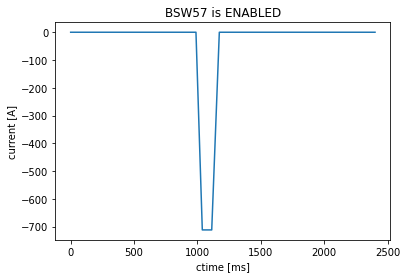

In [574]:
fig, ax = plt.subplots()
x = data[2]['PE.BSW57/REF.TABLE.FUNC#VALUE'][0]["data"][0]
y = data[2]['PE.BSW57/REF.TABLE.FUNC#VALUE'][0]["data"][1]
ax.plot(x,y)
ax.set_title(f"BSW57 is {data[2]['PE.BSW57/REF.FUNC.PLAY#value'][0][1]}")
ax.set_xlabel('ctime [ms]')
ax.set_ylabel('current [A]')

Text(0, 0.5, 'current [A]')

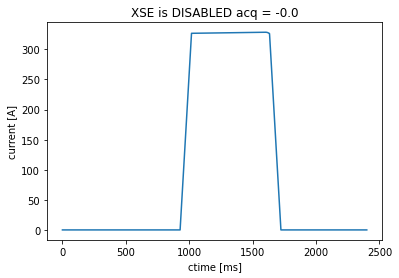

In [450]:
fig, ax = plt.subplots()
x = data[2]['PR.XSE/REF.TABLE.FUNC#VALUE'][0]["data"][0]
y = data[2]['PR.XSE/REF.TABLE.FUNC#VALUE'][0]["data"][1]
ax.plot(x,y)
acq = round(data[2]['PR.XSE/MEAS.PULSE#VALUE'][0],1)
ax.set_title(f"XSE is {data[2]['PR.XSE/REF.FUNC.PLAY#value'][0][1]} acq = {acq}")
ax.set_xlabel('ctime [ms]')
ax.set_ylabel('current [A]')

In [451]:
data[1][0].keys()

dict_keys(['header', 'position', 'positionH', 'positionV', 'channelNamesH', 'channelNames', 'channelNamesV'])

In [452]:
len(data[1][0]["position"]["data"])

86

In [453]:
len(data[1][0]["position"]["data"][0])

4499

In [454]:
data[1][0]["positionH"]["data"][0]

[38.39,
 38.26,
 38.48,
 40.38,
 39.78,
 36.86,
 39.88,
 37.52,
 39.32,
 39.56,
 41.5,
 38.46,
 38.74,
 38.13,
 38.56,
 38.57,
 40.42,
 38.15,
 38.36,
 38.42,
 40.25,
 41.44,
 39.83,
 40.78,
 38.47,
 38.21,
 39.05,
 39.06,
 39.92,
 40.37,
 38.3,
 38.97,
 38.0,
 38.76,
 41.17,
 38.84,
 37.19,
 40.65,
 37.99,
 39.2,
 40.14,
 39.8,
 39.73,
 37.97,
 39.16,
 40.46,
 39.0,
 40.41,
 37.7,
 38.22,
 38.98,
 39.21,
 40.61,
 40.53,
 38.09,
 39.57,
 37.07,
 40.21,
 41.5,
 39.46,
 37.91,
 37.52,
 40.57,
 39.36,
 40.83,
 39.03,
 39.66,
 38.01,
 40.28,
 37.62,
 40.33,
 38.79,
 39.29,
 37.96,
 39.45,
 40.13,
 37.62,
 39.87,
 39.56,
 38.44,
 38.62,
 39.83,
 39.48,
 38.99,
 39.03,
 38.69,
 38.25,
 39.17,
 39.41,
 40.05,
 39.39,
 38.89,
 37.23,
 40.52,
 39.05,
 38.98,
 39.16,
 39.63,
 36.46,
 40.17,
 39.69,
 40.85,
 40.12,
 38.28,
 37.41,
 38.75,
 37.82,
 40.64,
 38.22,
 40.25,
 38.43,
 37.75,
 40.44,
 39.6,
 38.65,
 39.1,
 37.29,
 37.28,
 39.23,
 39.62,
 41.73,
 39.08,
 37.15,
 38.43,
 39.1,
 38.76,
 40

In [455]:
len(data[1][0]["positionH"]["data"][0])

4499

In [456]:
len(data[1][0]["positionH"]["data"])

43

In [457]:
data[1][0]["channelNamesH"]["data"]

['PR.BPM00.H',
 'PR.BPM03.H',
 'PR.BPM05.H',
 'PR.BPM07.H',
 'PR.BPM10.H',
 'PR.BPM13.H',
 'PR.BPM15.H',
 'PR.BPM17.H',
 'PR.BPM20.H',
 'PR.BPM23.H',
 'PR.BPM25.H',
 'PR.BPM27.H',
 'PR.BPM30.H',
 'PR.BPM33.H',
 'PR.BPM35.H',
 'PR.BPM37.H',
 'PR.BPM40.H',
 'PR.BPM43.H',
 'PR.BPM45.H',
 'PR.BPM47.H',
 'PR.BPM50.H',
 'PR.BPM53.H',
 'PR.BPM54.H',
 'PR.BPM55.H',
 'PR.BPM57.H',
 'PR.BPM60.H',
 'PR.BPM63.H',
 'PR.BPM64.H',
 'PR.BPM65.H',
 'PR.BPM67.H',
 'PR.BPM68.H',
 'PR.BPM70.H',
 'PR.BPM73.H',
 'PR.BPM75.H',
 'PR.BPM77.H',
 'PR.BPM80.H',
 'PR.BPM83.H',
 'PR.BPM85.H',
 'PR.BPM87.H',
 'PR.BPM90.H',
 'PR.BPM93.H',
 'PR.BPM95.H',
 'PR.BPM97.H']

In [458]:
data[1][0]["positionH"]["data"][24]

[-40.94,
 -42.31,
 -41.18,
 -41.67,
 -41.06,
 -41.83,
 -41.46,
 -40.56,
 -40.6,
 -41.73,
 -40.6,
 -41.16,
 -42.3,
 -40.67,
 -41.08,
 -40.88,
 -40.67,
 -41.42,
 -41.12,
 -41.27,
 -41.41,
 -40.35,
 -42.11,
 -41.93,
 -40.66,
 -40.63,
 -41.41,
 -40.64,
 -41.15,
 -42.19,
 -40.69,
 -41.09,
 -42.53,
 -41.19,
 -41.63,
 -42.1,
 -40.99,
 -42.64,
 -41.32,
 -40.86,
 -41.43,
 -41.2,
 -40.17,
 -40.98,
 -42.57,
 -40.28,
 -41.31,
 -41.73,
 -41.89,
 -41.35,
 -41.34,
 -41.76,
 -40.86,
 -41.22,
 -41.27,
 -40.92,
 -41.41,
 -41.6,
 -41.43,
 -41.41,
 -41.14,
 -42.03,
 -40.73,
 -41.12,
 -41.04,
 -41.62,
 -41.49,
 -41.67,
 -42.54,
 -40.52,
 -41.38,
 -41.54,
 -41.55,
 -41.56,
 -40.85,
 -41.86,
 -41.31,
 -41.76,
 -42.01,
 -41.86,
 -41.11,
 -41.94,
 -39.87,
 -40.82,
 -41.13,
 -41.24,
 -40.82,
 -40.69,
 -41.0,
 -41.12,
 -42.12,
 -41.87,
 -41.14,
 -41.28,
 -41.9,
 -40.75,
 -42.08,
 -41.32,
 -40.9,
 -41.55,
 -40.56,
 -40.95,
 -41.99,
 -42.25,
 -40.43,
 -40.99,
 -41.43,
 -41.01,
 -41.08,
 -42.64,
 -42.23,
 -41.5,
 -

Text(0, 0.5, 'Position [mm]')

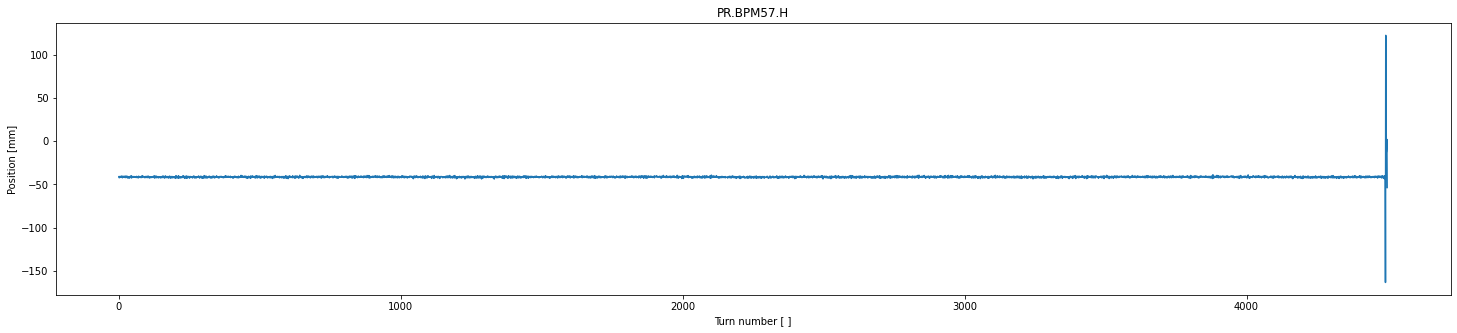

In [459]:
fig, ax = plt.subplots(figsize=(25,5))

bpm_number = 24

y = data[1][0]["positionH"]["data"][bpm_number]

ax.plot(np.linspace(0,len(y),len(y)),y)
ax.set_title(f'{data[1][0]["channelNamesH"]["data"][bpm_number]}')
ax.set_xlabel('Turn number [ ]')
ax.set_ylabel('Position [mm]')

Text(0, 0.5, 'Position [mm]')

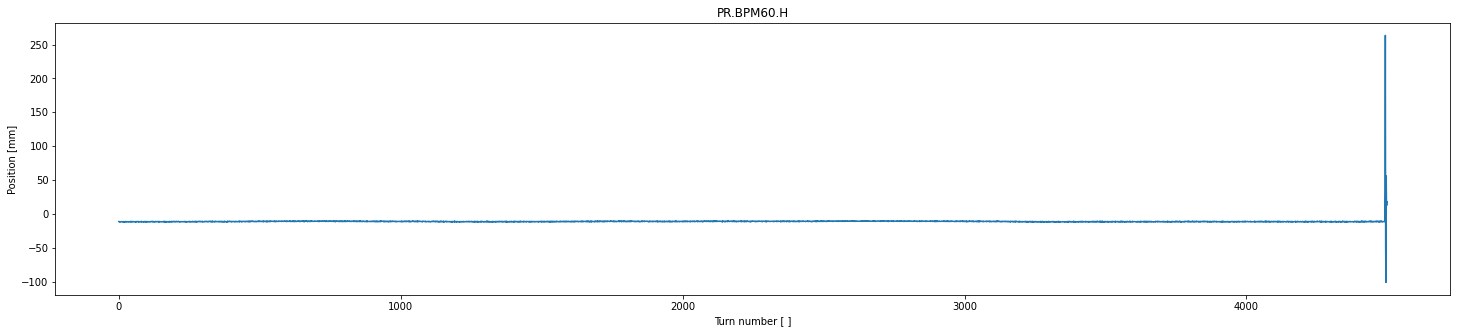

In [460]:
fig, ax = plt.subplots(figsize=(25,5))

bpm_number = 25

y = data[1][0]["positionH"]["data"][bpm_number]

ax.plot(np.linspace(0,len(y),len(y)),y)
ax.set_title(f'{data[1][0]["channelNamesH"]["data"][bpm_number]}')
ax.set_xlabel('Turn number [ ]')
ax.set_ylabel('Position [mm]')

In [461]:
len(data[1][0]["positionV"]["data"])

43

In [462]:
len(data[1][0]["channelNames"]["data"])

86

In [463]:
len(data[1][0]["channelNamesH"]["data"])

43

In [464]:
len(data[1][0]["channelNamesV"]["data"])

43

In [465]:
data[1][0]["positionH"]["data"][0][0]

38.39

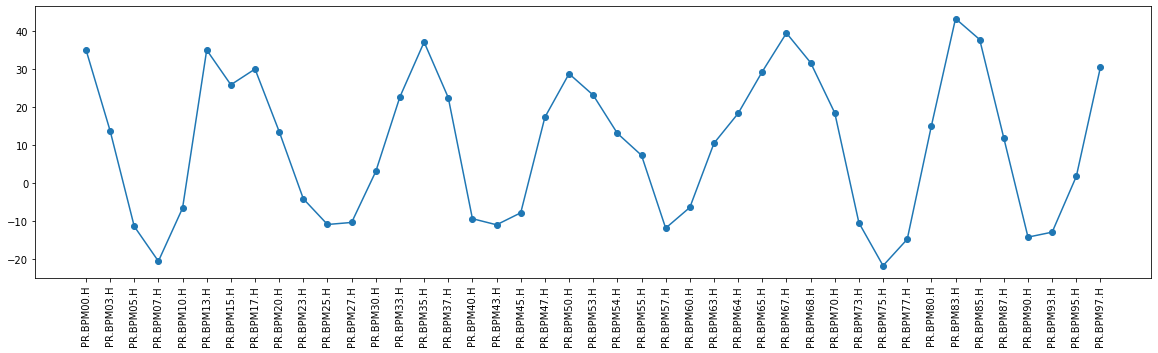

In [578]:
fig, ax = plt.subplots(figsize=(20,5))


my_list = []
for i in range(len(data[1][0]["positionH"]["data"])):
    my_list.append(data[1][0]["positionH"]["data"][i][1])

ax.plot(data[1][0]["channelNamesH"]["data"], my_list, marker="o")


ax.tick_params(axis='x', labelrotation = 90)

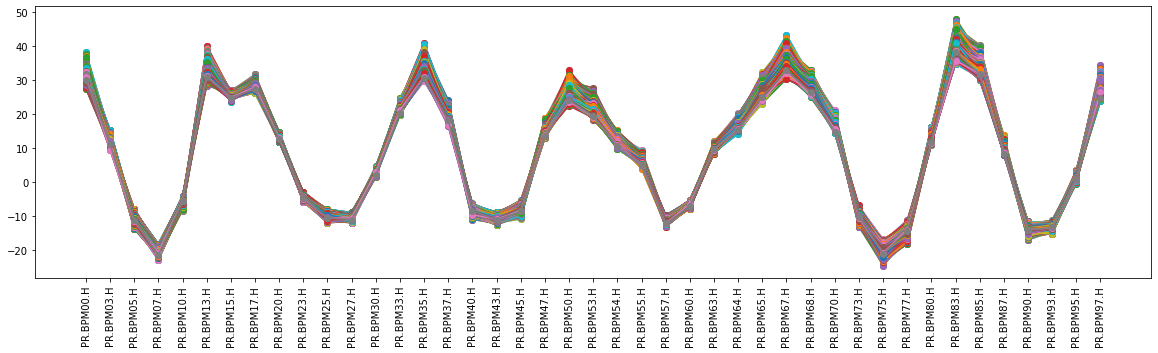

In [585]:
fig, ax = plt.subplots(figsize=(20,5))

for j in range(len(data[1][0]["positionH"]["data"][0])):
    my_list = []
    for i in range(len(data[1][0]["positionH"]["data"])):
        my_list.append(data[1][0]["positionH"]["data"][i][j])

    ax.plot(data[1][0]["channelNamesH"]["data"], my_list, marker="o")

for j in range(len(data[1][5]["positionH"]["data"][0])):
    my_list = []
    for i in range(len(data[1][5]["positionH"]["data"])):
        my_list.append(data[1][5]["positionH"]["data"][i][j])

    ax.plot(data[1][0]["channelNamesH"]["data"], my_list, marker="o")


ax.tick_params(axis='x', labelrotation = 90)

In [580]:
len(data[1][0]["positionH"]["data"][i])

4499

4488
4489
4490
4491


(-100.0, 100.0)

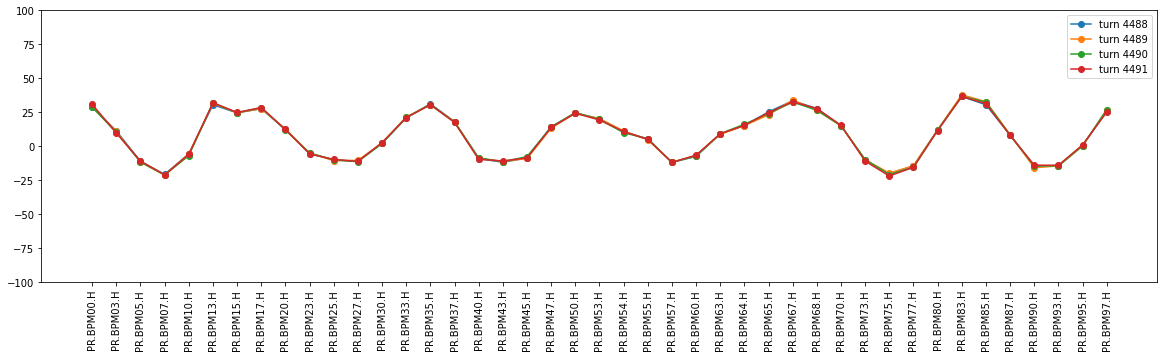

In [581]:
fig, ax = plt.subplots(figsize=(20,5))

for turn_number in range(4488,4492):
    print (turn_number)
    my_list = []
    for i in range(len(data[1][0]["positionH"]["data"])):
        my_list.append(data[1][0]["positionH"]["data"][i][int(turn_number)])

    ax.plot(data[1][0]["channelNamesH"]["data"], my_list, marker="o", label = f'turn {turn_number}')


ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
ax.set_ylim(-100,100)

In [582]:
list(range(500,510))

[500, 501, 502, 503, 504, 505, 506, 507, 508, 509]

# Now we can do the difference between the turn after and before the kick

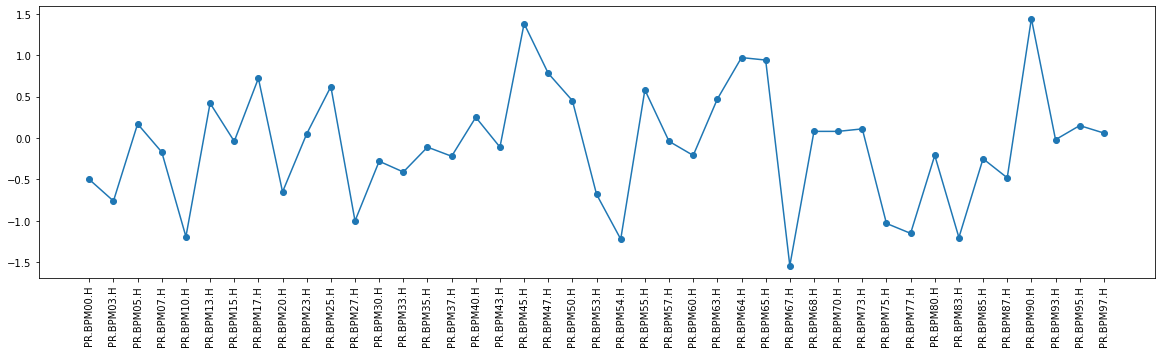

In [583]:
fig, ax = plt.subplots(figsize=(20,5))

turn_number_kick = 4490

my_list = []
for i in range(len(data[1][0]["positionH"]["data"])):
    my_list.append( data[1][0]["positionH"]["data"][i][int(turn_number_kick)] - data[1][0]["positionH"]["data"][i][int(turn_number_kick-1)] )

ax.plot(data[1][0]["channelNamesH"]["data"], my_list, marker="o")


ax.tick_params(axis='x', labelrotation = 90)